<a href="https://colab.research.google.com/github/Vinh1207/Phan-Cao-Vinh/blob/main/Nhandientien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
train_image_files_path = "/content/drive/MyDrive/Nhandientien/Train" 
valid_image_files_path = "/content/drive/MyDrive/Nhandientien/Validation"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [4]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(150, 150),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(150, 150),               
    class_mode='categorical')


Found 888 images belonging to 10 classes.
Found 105 images belonging to 10 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
history=model.fit(train_generator,epochs=20,batch_size=128,verbose=1, validation_data=validation_generator)

Epoch 1/20
28/28 [==============================] - 296s 10s/step - loss: 4.0163 - accuracy: 0.1149 - val_loss: 2.3001 - val_accuracy: 0.1143
Epoch 2/20
28/28 [==============================] - 154s 5s/step - loss: 2.2901 - accuracy: 0.1284 - val_loss: 2.2855 - val_accuracy: 0.1143
Epoch 3/20
28/28 [==============================] - 158s 6s/step - loss: 2.2150 - accuracy: 0.1926 - val_loss: 2.2931 - val_accuracy: 0.1143
Epoch 4/20
28/28 [==============================] - 158s 6s/step - loss: 2.2531 - accuracy: 0.1655 - val_loss: 2.3016 - val_accuracy: 0.1048
Epoch 5/20
28/28 [==============================] - 159s 6s/step - loss: 2.1885 - accuracy: 0.1971 - val_loss: 2.3370 - val_accuracy: 0.1619
Epoch 6/20
28/28 [==============================] - 156s 6s/step - loss: 1.9393 - accuracy: 0.2928 - val_loss: 2.1349 - val_accuracy: 0.2190
Epoch 7/20
28/28 [==============================] - 157s 6s/step - loss: 1.4721 - accuracy: 0.4809 - val_loss: 1.9399 - val_accuracy: 0.3714
Epoch 8/20
2

<function matplotlib.pyplot.show(*args, **kw)>

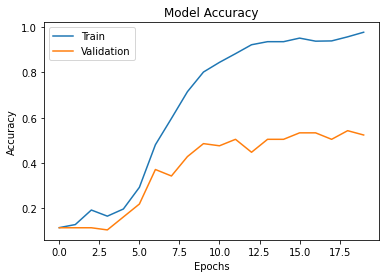

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [9]:
model.save("Nhan_dien_tien.h5")

In [10]:
from tensorflow.keras.models import load_model
model_money=load_model('Nhan_dien_tien.h5')

1/1 [==============================] - 0s 397ms/step
NAM MUOI NGAN DONG


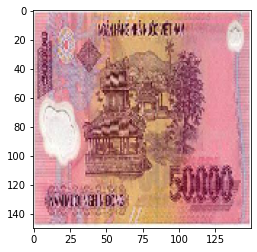

1/1 [==============================] - 0s 225ms/step
HAI MUOI NGAN DONG


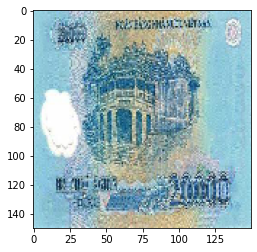

1/1 [==============================] - 0s 62ms/step
NAM NGAN DONG


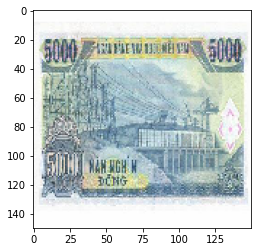

1/1 [==============================] - 0s 57ms/step
MOT NGAN DONG


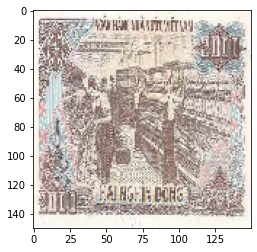

1/1 [==============================] - 0s 56ms/step
NAM TRAM DONG


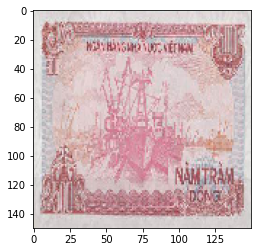

1/1 [==============================] - 0s 92ms/step
HAI TRAM NGAN DONG


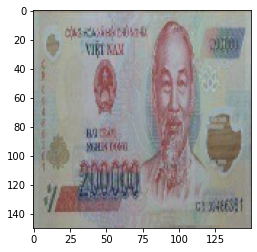

1/1 [==============================] - 0s 99ms/step
NAM TRAM NGAN DONG


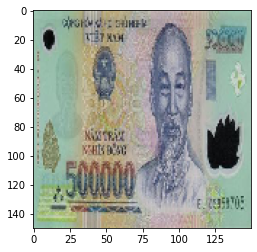

1/1 [==============================] - 0s 98ms/step
MOT TRAM NGAN DONG


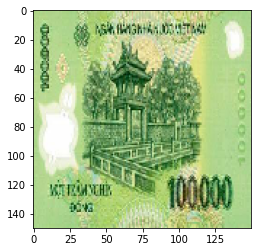

1/1 [==============================] - 0s 125ms/step
MUOI NGAN DONG


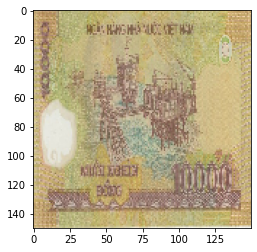

1/1 [==============================] - 0s 111ms/step
NAM TRAM NGAN DONG


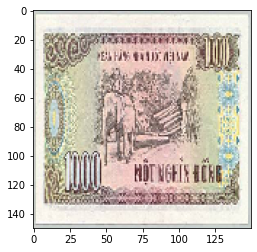

In [11]:
from tensorflow.keras.utils import load_img,img_to_array
test="/content/drive/MyDrive/Nhandientien/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_money.predict(img)
  if round(result[0][0])==1:
    prediction='MOT TRAM NGAN DONG'
  if round(result[0][1])==1:
    prediction='MUOI NGAN DONG'
  if round(result[0][2])==1:
    prediction='MOT NGAN DONG'
  if round(result[0][3])==1:
    prediction='HAI TRAM NGAN DONG'
  if round(result[0][4])==1:
    prediction='HAI MUOI NGAN DONG'
  if round(result[0][5])==1:
    prediction='HAI NGAN DONG'
  if round(result[0][6])==1:
    prediction='NAM TRAM DONG'
  if round(result[0][7])==1:
    prediction='NAM TRAM NGAN DONG'
  if round(result[0][8])==1:
    prediction='NAM MUOI NGAN DONG'
  if round(result[0][9])==1:
    prediction='NAM NGAN DONG'
  print(prediction)
  plt.show()